## Supervised Learning Example: Linear regression

In [3]:
%load_ext watermark
%watermark -a "Alessandro Parisi" -u -d -v -p numpy,pandas,matplotlib,sklearn,seaborn
# to install watermark launch 'pip install watermark' at command line


Alessandro Parisi 
last updated: 2019-01-14 

CPython 3.5.4
IPython 6.1.0

numpy 1.13.3
pandas 0.20.3
matplotlib 2.0.2
sklearn 0.20.0
seaborn 0.8.0


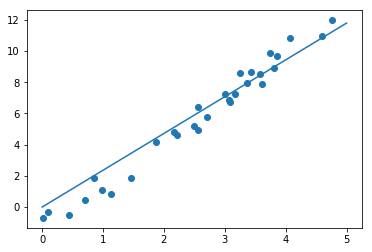

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

pool = np.random.RandomState(10)
x = 5 * pool.rand(30)
y = 3 * x - 2 + pool.randn(30)

# y = 3x - 2;
lregr = LinearRegression(fit_intercept=False)

X = x[:, np.newaxis]
lregr.fit(X, y)

lspace = np.linspace(0, 5)
X_regr = lspace[:, np.newaxis]
y_regr = lregr.predict(X_regr)

plt.scatter(x, y);
plt.plot(X_regr, y_regr);

## Unsupervised Learning Example: Clustering

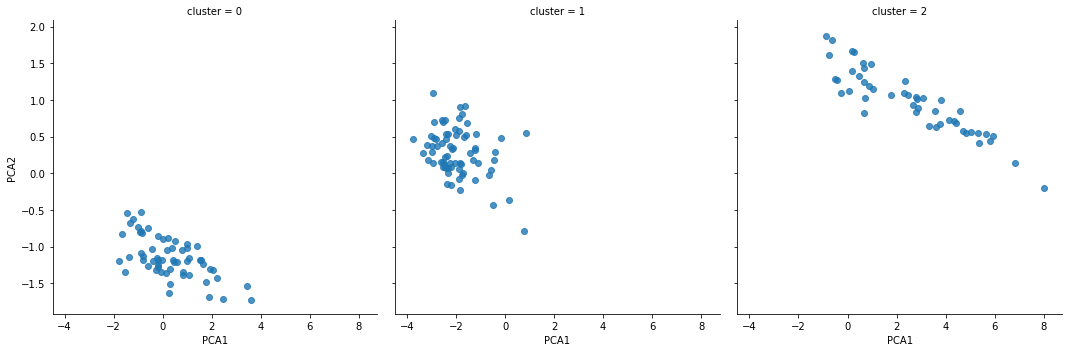

In [5]:
import pandas as pd
import seaborn as sns

data_df = pd.read_csv("../datasets/clustering.csv")
data_df.describe()

X_data = data_df.drop('class_1', axis=1)
y_data = data_df['class_1']

from sklearn.decomposition import PCA   
pca = PCA(n_components=2)               
pca.fit(X_data)                         
X_2D = pca.transform(X_data)            

data_df['PCA1'] = X_2D[:, 0]
data_df['PCA2'] = X_2D[:, 1]

from sklearn.mixture import GaussianMixture         
gm = GaussianMixture(n_components=3, covariance_type='full')     

gm.fit(X_data)                         
y_gm = gm.predict(X_data)              


data_df['cluster'] = y_gm
sns.lmplot("PCA1", "PCA2", data=data_df, col='cluster', fit_reg=False)


## Simple Neural Network Example: Perceptron

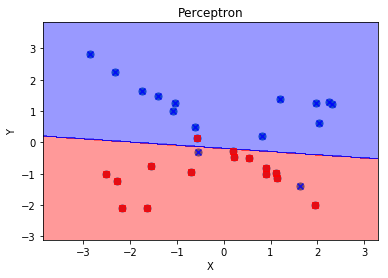

In [6]:
from matplotlib.colors import ListedColormap

# Thanks to Sebastian Raschka for 'plot_decision_regions' function
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

from sklearn.linear_model import perceptron

from sklearn.datasets import make_classification
X, y = make_classification(30, 2, 2, 0, weights=[.3, .3], random_state=300) 

plt.scatter(X[:,0], X[:,1], s=50)

pct = perceptron.Perceptron(max_iter=100, verbose=0, random_state=300, fit_intercept=True, eta0=0.002)
pct.fit(X, y)

plot_decision_regions(X, y, classifier=pct)
plt.title('Perceptron')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
